In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

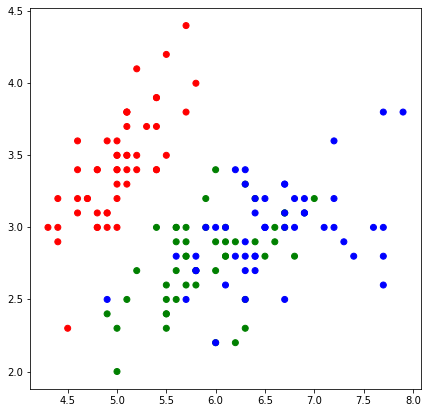

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [76]:
class KNN():
    def __init__(self, k):
        self.k = k
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def set_k(self, k):
        self.k = k

    def predict(self, x_test, weigth_fun='weigth_d'):
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(self.x_train)):

                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x, self.x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append(( distance, self.y_train[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(self.y_train)}

            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
            j = 1
            for d in sorted(test_distances)[0:self.k]:
                if (weigth_fun == 'weigth_d'):
                    classes[d[1]] += self.weigth_d(d[0]) * 1
                else:
                    classes[d[1]] += self.weigth_i(j) * 1
                    j += 1

            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(sorted(classes, key=classes.get)[-1])
        return answers
    def accuracy(self, pred, y):
        return (sum(pred == y) / len(y))
        
    def e_metrics(self, x1, x2):

        distance = 0
        for i in range(len(x1)):
            distance += np.square(x1[i] - x2[i])

        return np.sqrt(distance)
    
    def weigth_i(self,i):
        return 1/i

    def weigth_d(self,d):
        return 1/(d+1)

In [77]:
knn_obj = KNN(k)
knn_obj.fit(X_train, y_train)
y_pred = knn_obj.predict(X_test)
print(f'Точность алгоритма при k = {k}: {knn_obj.accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 9: 0.867


In [61]:
def get_graph(X_train, y_train, k, weigth_fun='weigth_d'):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    knn_obj = KNN(k)
    knn_obj.fit(X_train, y_train)
    Z = knn_obj.predict(np.c_[xx.ravel(), yy.ravel()], weigth_fun)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

<ipython-input-61-d0a951c72cae>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


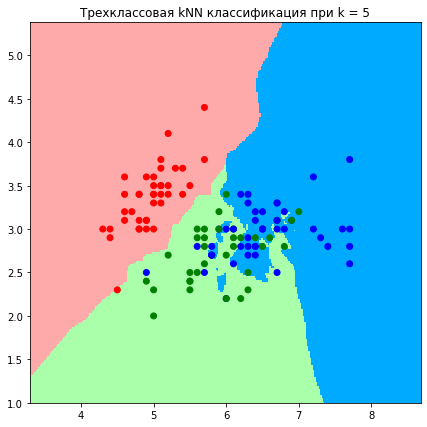

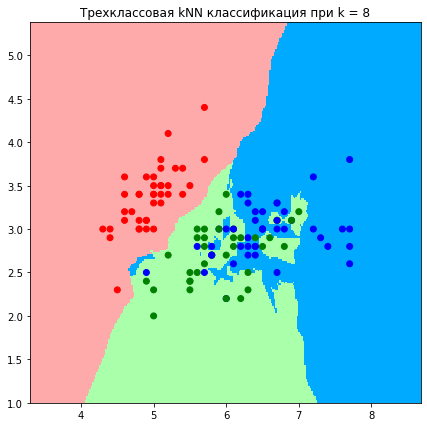

In [78]:
get_graph(X_train, y_train, 5)
get_graph(X_train, y_train, 8, 'weigth_i')

In [80]:
max_i = 0
k_i = 1
max_d = 0
k_d = 1
for k in range(2,15):
    knn_obj = KNN(k)
    knn_obj.fit(X_train, y_train)
    y_pred_i = knn_obj.predict(X_test, 'weigth_i')
    y_pred_d = knn_obj.predict(X_test)
    accuracy_i  = knn_obj.accuracy(y_pred_i, y_test)
    accuracy_d  = knn_obj.accuracy(y_pred_d, y_test)
    if(accuracy_i > max_i):
        max_i = accuracy_i
        k_i = k
    if(accuracy_d > max_d):
        max_d = accuracy_d
        k_d = k
    print(f'Точность алгоритма при k = {k} функции weigth_i: {accuracy_i:.3f}')
    print(f'Точность алгоритма при k = {k} функции weigth_d: {accuracy_d:.3f}')
    
print(f'Оптимальноое k для функции weigth_i: {k_i}. Дает точность {max_i:.3f}')
print(f'Оптимальноое k для функции weigth_d: {k_d}. Дает точность {max_d:.3f}')

Точность алгоритма при k = 2 функции weigth_i: 0.667
Точность алгоритма при k = 2 функции weigth_d: 0.733
Точность алгоритма при k = 3 функции weigth_i: 0.667
Точность алгоритма при k = 3 функции weigth_d: 0.733
Точность алгоритма при k = 4 функции weigth_i: 0.733
Точность алгоритма при k = 4 функции weigth_d: 0.767
Точность алгоритма при k = 5 функции weigth_i: 0.733
Точность алгоритма при k = 5 функции weigth_d: 0.867
Точность алгоритма при k = 6 функции weigth_i: 0.733
Точность алгоритма при k = 6 функции weigth_d: 0.867
Точность алгоритма при k = 7 функции weigth_i: 0.733
Точность алгоритма при k = 7 функции weigth_d: 0.800
Точность алгоритма при k = 8 функции weigth_i: 0.767
Точность алгоритма при k = 8 функции weigth_d: 0.833
Точность алгоритма при k = 9 функции weigth_i: 0.767
Точность алгоритма при k = 9 функции weigth_d: 0.867
Точность алгоритма при k = 10 функции weigth_i: 0.767
Точность алгоритма при k = 10 функции weigth_d: 0.867
Точность алгоритма при k = 11 функции weigth

In [ ]:
#при использовании в качестве веса функцию от расстояния между соседями большей точности можно добиться
#прии меньшем количестве соседей при предсказании результата